In [1]:
import os
import json
import statistics
from matplotlib import pyplot as plt

In [2]:
os.chdir('./server/Linux')
print(os.getcwd())

/home/jsh/GitHub/SWCON_Project/2017110266/server/Linux


In [3]:
with open('ServerSpeedResult.json') as file:
    data = json.load(file)
py_data = data['ServerLanguage']['python']
js_data = data['ServerLanguage']['javascript']

languages = ['Python 3', 'JS (node)']
################### JSON GET ########################
json_get_py = py_data['json']['GET']
json_get_js = js_data['json']['GET']

json_get_best = list(map(lambda x : float(format(x,'.2f')),[min(json_get_py), min(json_get_js)]))
json_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(json_get_py), max(json_get_js)]))
json_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(json_get_py), statistics.median(json_get_js)]))
#####################################################
################## JSON POST ########################
json_post_py = py_data['json']['POST']
json_post_js = js_data['json']['POST']

json_post_best = list(map(lambda x : float(format(x,'.2f')),[min(json_post_py), min(json_post_js)]))
json_post_worst = list(map(lambda x : float(format(x,'.2f')),[max(json_post_py), max(json_post_js)]))
json_post_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(json_post_py), statistics.median(json_post_js)]))
#####################################################
################## Calc GET #########################
calc_get_py = py_data['calc']['GET']
calc_get_js = js_data['calc']['GET']

calc_get_best = list(map(lambda x : float(format(x,'.2f')),[min(calc_get_py), min(calc_get_js)]))
calc_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(calc_get_py), max(calc_get_js)]))
calc_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(calc_get_py), statistics.median(calc_get_js)]))
#####################################################
################## Html GET #########################
html_get_py = py_data['html']['GET']
html_get_js = js_data['html']['GET']

html_get_best = list(map(lambda x : float(format(x,'.2f')),[min(html_get_py), min(html_get_js)]))
html_get_worst = list(map(lambda x : float(format(x,'.2f')),[max(html_get_py), max(html_get_js)]))
html_get_median = list(map(lambda x : float(format(x,'.2f')),[statistics.median(html_get_py), statistics.median(html_get_js)]))
#####################################################

In [4]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

<Figure size 1080x720 with 0 Axes>

In [5]:
def makePlot(ax,best,worst,median,title):
    width = 0.3

    index = [0,1]
    ax.barh(index, best, width)

    for i,v in enumerate(index):
        s = str(best[i])
        ax.text(best[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x: x+width,index))
    ax.barh(index,worst,width)

    for i,v in enumerate(index):
        s = str(worst[i])
        ax.text(worst[i],v,s,horizontalalignment='left',verticalalignment='center')

    index = list(map(lambda x: x+width, index))
    ax.barh(index,median,width)

    for i,v in enumerate(index):
        s = str(median[i])
        ax.text(median[i],v,s,horizontalalignment='left',verticalalignment='center')


    ax.set_yticks([0.2,1.3])
    ax.set_yticklabels(languages)
    ax.set_ylabel('Server', fontsize = 15)
    ax.set_xlabel('Time(ms)',fontsize = 15)
    ax.set_title(title,fontsize = 20)

In [6]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
makePlot(ax1,json_get_best,json_get_worst,json_get_median,'GET JSON')
makePlot(ax2,json_post_best,json_post_worst,json_post_median,'POST JSON')
makePlot(ax3,calc_get_best,calc_get_worst,calc_get_median,'GET Calc')
makePlot(ax4,html_get_best,html_get_worst,html_get_median,'GET html')

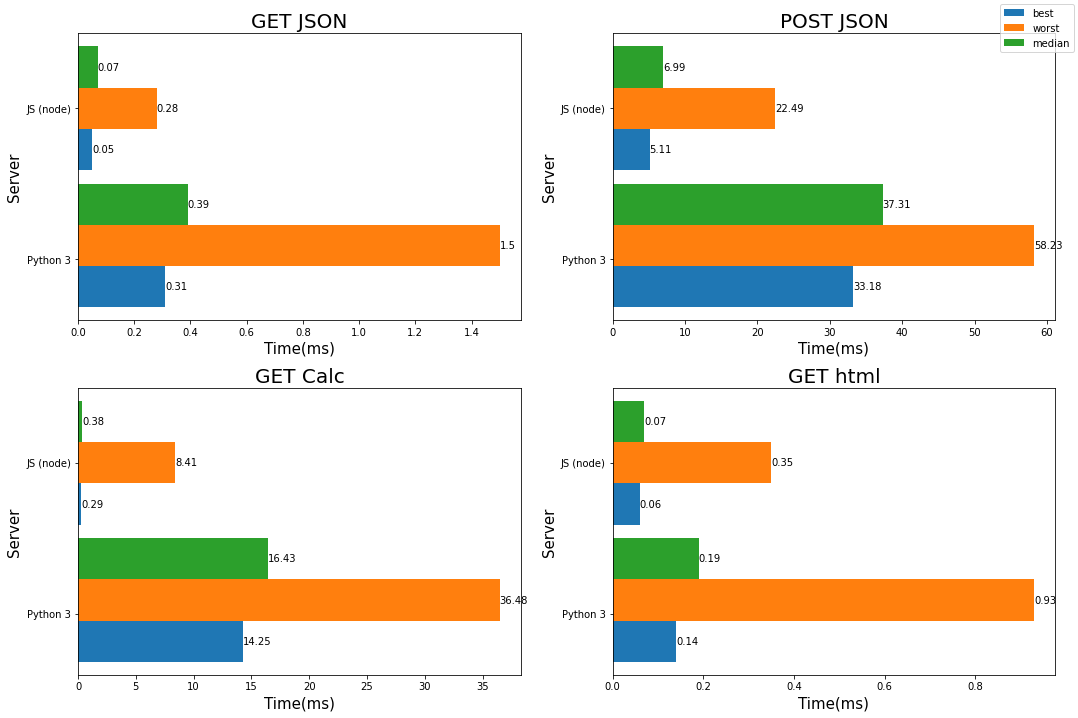

In [7]:
fig.legend(['best','worst','median'])
fig.tight_layout()
fig